In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
features=['price','bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','sqft_above','sqft_basement',
         'yr_built','yr_renovated','street','city','statezip','country']

In [6]:
data=data[features]
data.head()
data.shape

(4600, 16)

In [7]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [8]:
data.dtypes


price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street             int64
city               int64
statezip           int64
country            int64
dtype: object

In [9]:
data['price']=(data['price']).astype(int)
data['bedrooms']=(data['bedrooms']).astype(int)
data['floors']=(data['floors']).astype(int)
data['bathrooms']=(data['bathrooms']).astype(int)

In [10]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1,1340,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2384000,5,2,3650,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,342000,3,2,1930,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,420000,3,2,2000,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,550000,4,2,1940,1,0,0,4,1140,800,1976,1992,4352,31,31,0


In [11]:
import seaborn as sns

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          4600 non-null   int32
 1   bedrooms       4600 non-null   int32
 2   bathrooms      4600 non-null   int32
 3   sqft_living    4600 non-null   int64
 4   floors         4600 non-null   int32
 5   waterfront     4600 non-null   int64
 6   view           4600 non-null   int64
 7   condition      4600 non-null   int64
 8   sqft_above     4600 non-null   int64
 9   sqft_basement  4600 non-null   int64
 10  yr_built       4600 non-null   int64
 11  yr_renovated   4600 non-null   int64
 12  street         4600 non-null   int64
 13  city           4600 non-null   int64
 14  statezip       4600 non-null   int64
 15  country        4600 non-null   int64
dtypes: int32(4), int64(12)
memory usage: 503.2 KB


In [13]:
corr=data[features].corr()
corr

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
price,1.000000,0.200336,0.317229,0.430410,0.137125,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,-0.043385,NaN
bedrooms,0.200336,1.000000,0.498491,0.594884,0.157433,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082,-0.035507,-0.130447,-0.152773,NaN
bathrooms,0.317229,0.498491,1.000000,0.711253,0.463729,0.071806,0.203389,-0.118819,0.649091,0.270301,0.394516,-0.185970,0.014621,-0.069532,-0.153825,NaN
sqft_living,0.430410,0.594884,0.711253,1.000000,0.340993,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.006411,-0.109686,-0.198918,NaN
floors,0.137125,0.157433,0.463729,0.340993,1.000000,0.017955,0.021116,-0.306464,0.517319,-0.253308,0.562218,-0.247150,0.037869,0.035746,-0.087240,NaN
waterfront,0.135648,-0.003483,0.071806,0.117616,0.017955,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.035448,0.001450,0.007938,NaN
view,0.228504,0.111028,0.203389,0.311009,0.021116,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.065077,0.001340,0.079340,NaN
condition,0.034915,0.025080,-0.118819,-0.062826,-0.306464,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.005480,-0.010592,0.027666,NaN
sqft_above,0.367570,0.484705,0.649091,0.876443,0.517319,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,-0.013709,-0.121701,-0.247666,NaN
sqft_basement,0.210427,0.334165,0.270301,0.447206,-0.253308,0.097501,0.321602,0.200632,-0.038723,1.000000,-0.161675,0.043125,0.038769,-0.001559,0.047251,NaN


In [14]:
valid_part=0.3
pd.set_option("max_columns",100)

In [15]:
data.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000,3,1,1340,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2384000,5,2,3650,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,342000,3,2,1930,1,0,0,4,1930,0,1966,0,2291,18,26,0
3,420000,3,2,2000,1,0,0,4,1000,1000,1963,0,4263,3,7,0
4,550000,4,2,1940,1,0,0,4,1140,800,1976,1992,4352,31,31,0


In [16]:
data.shape

(4600, 16)

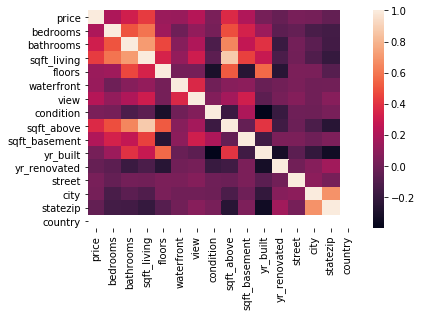

In [17]:
sns.heatmap(corr)

In [18]:
mask=np.zeros_like(data[features].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

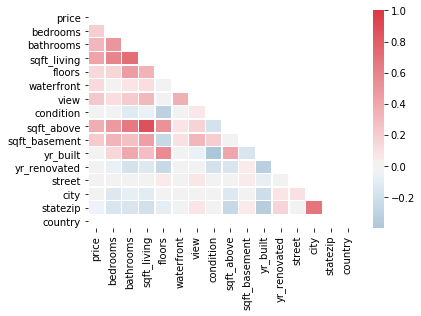

In [19]:
cmap=sns.diverging_palette(240,10,as_cmap=True)
sns.heatmap(corr,mask=mask,linewidths=.5,cmap=cmap,center=0)

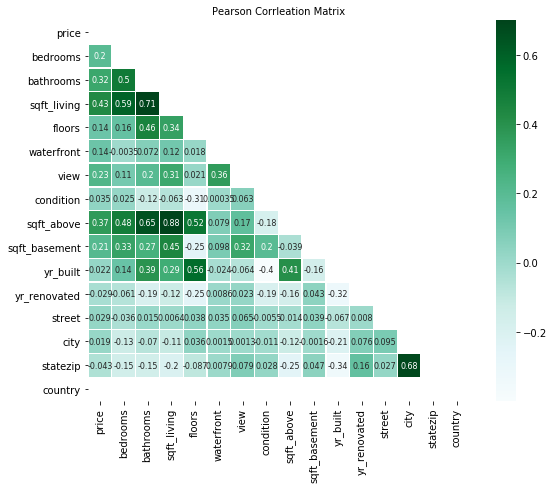

In [20]:
f,ax=plt.subplots(figsize=(10,7))
plt.title('Pearson Corrleation Matrix',fontsize=10)
sns.heatmap(corr,linewidths=0.25,vmax=0.7,square=True,cmap='BuGn',linecolor='w',annot=True,annot_kws={'size':8},mask=mask,cbar={'shrink':.9})

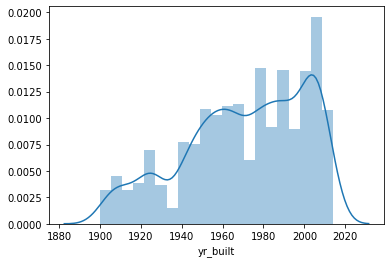

In [21]:
sns.distplot(data['yr_built'])

In [22]:
data=data[(data['price']<=1000000)&(data['price']>150000)&(data['bathrooms']<=6)&(data['condition']>2)&(data['sqft_living']>800)&(data['bedrooms']>=1&(data['bedrooms']<4.5))]

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4042 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          4042 non-null   int32
 1   bedrooms       4042 non-null   int32
 2   bathrooms      4042 non-null   int32
 3   sqft_living    4042 non-null   int64
 4   floors         4042 non-null   int32
 5   waterfront     4042 non-null   int64
 6   view           4042 non-null   int64
 7   condition      4042 non-null   int64
 8   sqft_above     4042 non-null   int64
 9   sqft_basement  4042 non-null   int64
 10  yr_built       4042 non-null   int64
 11  yr_renovated   4042 non-null   int64
 12  street         4042 non-null   int64
 13  city           4042 non-null   int64
 14  statezip       4042 non-null   int64
 15  country        4042 non-null   int64
dtypes: int32(4), int64(12)
memory usage: 473.7 KB


In [24]:
import pandas_profiling as pp

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
pp.ProfileReport(data)

In [ ]:
print(2+2)

In [25]:
import matplotlib.gridspec as gridspec

In [26]:
import xgboost as xgb

In [27]:
import matplotlib.style as style
from scipy import stats

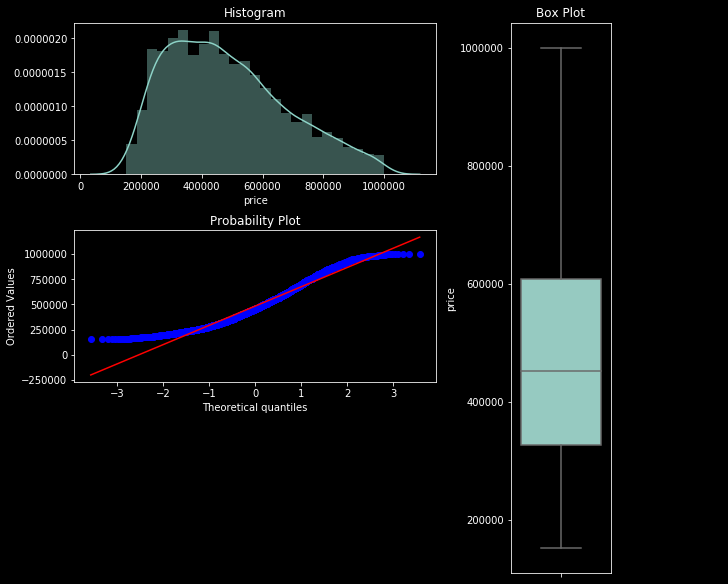

In [28]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    style.use('dark_background')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(10,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=4, nrows=4, figure=fig)
    
    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(data, 'price')

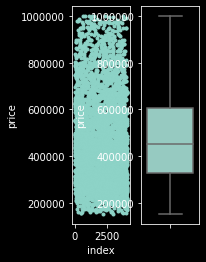

In [29]:
y = np.array(data.price)
plt.subplot(151)
plt.plot(range(len(y)),y,'.');
plt.ylabel('price');
plt.xlabel('index');
plt.subplot(152)
sns.boxplot(y=data.price)

In [30]:
from mpl_toolkits import mplot3d

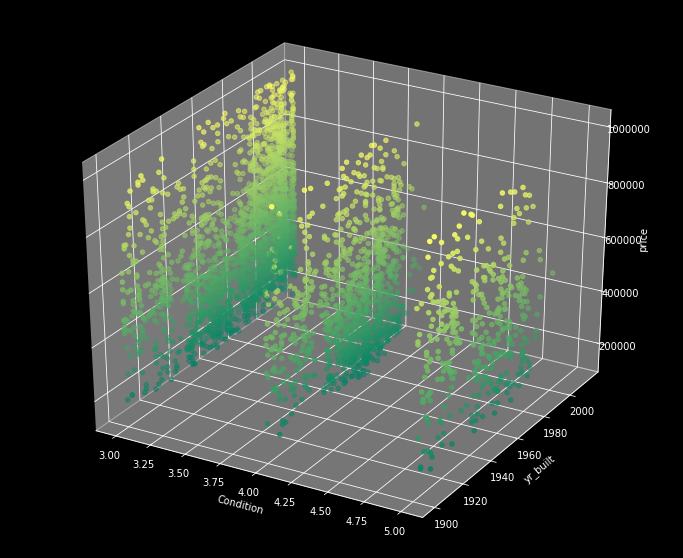

In [31]:
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection="3d")
z_points=data['price']
x_points=data['condition']
y_points=data['yr_built']
ax.scatter3D(x_points,y_points,z_points,c=z_points,cmap='summer');
ax.set_xlabel('Condition');
ax.set_ylabel('yr_built');
ax.set_zlabel('price');
plt.show()

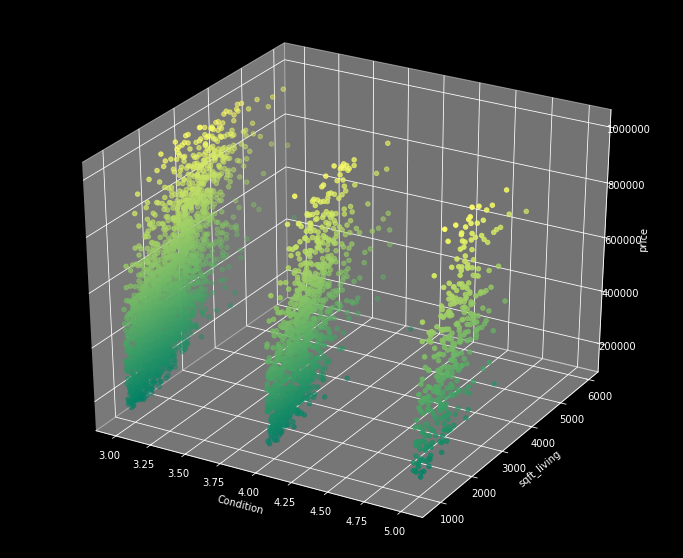

In [32]:
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection="3d")
z_points=data['price']
x_points=data['condition']
y_points=data['sqft_living']
ax.scatter3D(x_points,y_points,z_points,c=z_points,cmap='summer');
ax.set_xlabel('Condition');
ax.set_ylabel('sqft_living');
ax.set_zlabel('price');
plt.show()

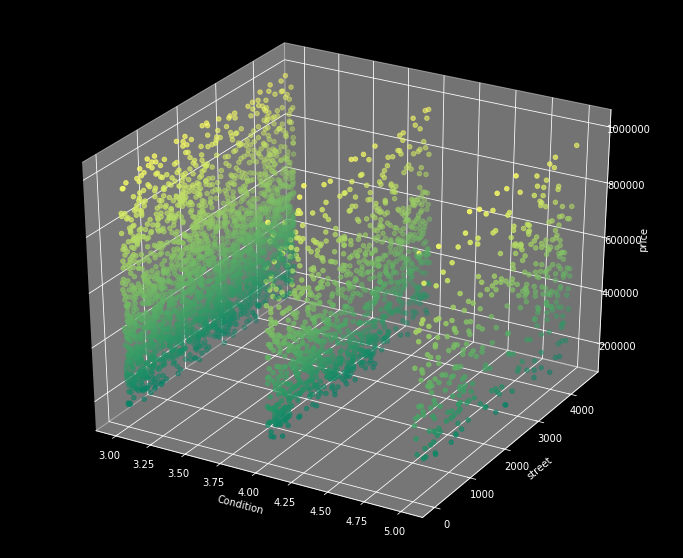

In [33]:
fig=plt.figure(figsize=(12,10))
ax=plt.axes(projection="3d")
z_points=data['price']
x_points=data['condition']
y_points=data['street']
ax.scatter3D(x_points,y_points,z_points,c=z_points,cmap='summer');
ax.set_xlabel('Condition');
ax.set_ylabel('street');
ax.set_zlabel('price');
plt.show()

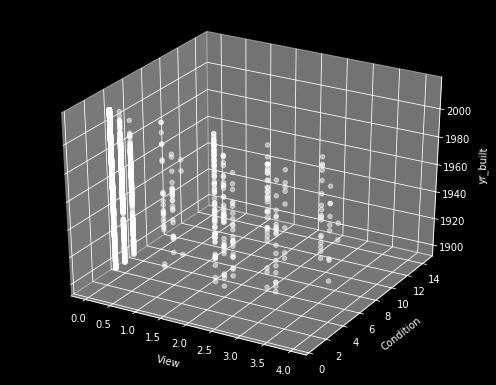

In [34]:
fig=plt.figure(figsize=(19,15))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(data['view'],data['condition'],data['yr_built'],c="white",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nCondition',zlabel='\nyr_built')
ax.set(ylim=[0,15])
plt.show()


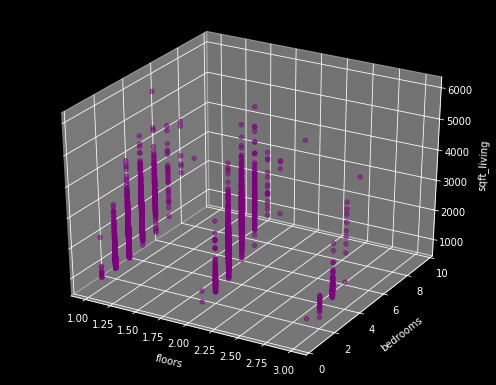

In [35]:
fig=plt.figure(figsize=(19,15))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(data['floors'],data['bedrooms'],data['sqft_living'],c="purple",alpha=.5)
ax.set(xlabel='\nfloors',ylabel='\nbedrooms',zlabel='\nsqft_living')
ax.set(ylim=[0,10])
plt.show()

In [36]:
grpby_bedrooms_df=data[['price','bedrooms']].groupby(by="bedrooms",as_index=False)
grpby_bedrooms_df=grpby_bedrooms_df.mean().astype(int)
grpby_bedrooms_df.head()

,bedrooms,price
0,1,344921
1,2,409449
2,3,444431
3,4,547698
4,5,563318


In [37]:
grpby_yrbuilt_df=data[['price','yr_built']].groupby(by='yr_built',as_index=False)
grpby_yrbuilt_df=grpby_yrbuilt_df.mean().astype(int)
grpby_yrbuilt_df.head()


,yr_built,price
0,1900,511235
1,1901,516018
2,1902,654031
3,1903,456677
4,1904,501933


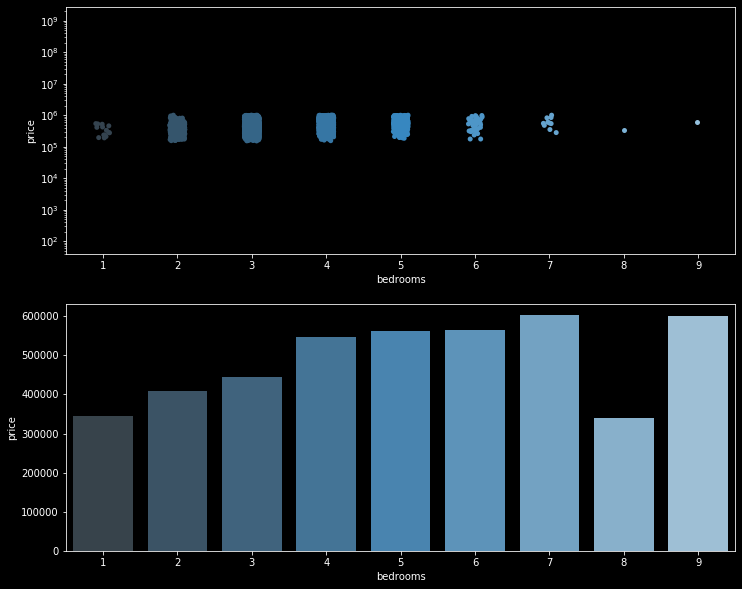

In [38]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))
ax1.set(yscale="log")
sns.stripplot(x="bedrooms",y="price",data=data,ax=ax1,jitter=True,palette="Blues_d")
sns.barplot(x="bedrooms",y="price",data=grpby_bedrooms_df,ax=ax2,palette="Blues_d")
plt.show()

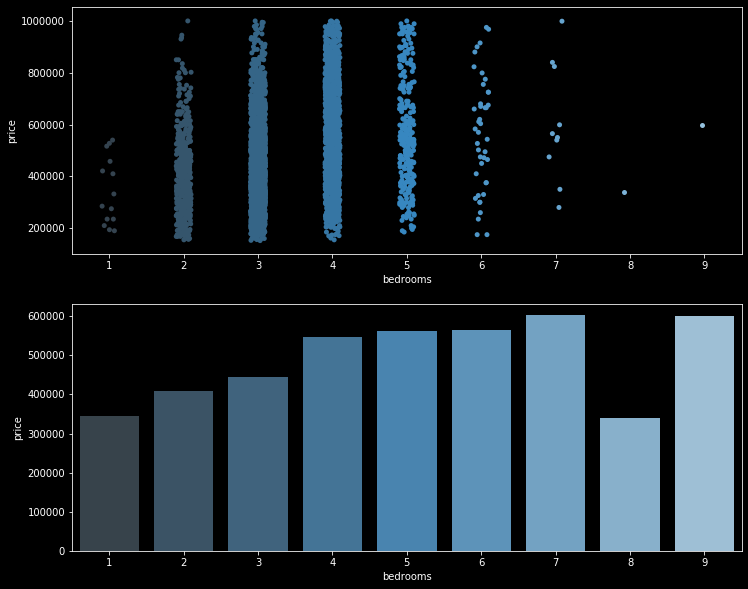

In [39]:
f,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))       
ax1.set(yscale="linear")
ax2.set(yscale="linear")
sns.stripplot(x="bedrooms",y="price",data=data,ax=ax1,jitter=True,palette="Blues_d")
sns.barplot(x="bedrooms",y="price",data=grpby_bedrooms_df,ax=ax2,palette="Blues_d")
plt.show()

In [40]:
x=data.drop(['price'],axis=1)
y=data['price']
x.shape,y.shape

((4042, 15), (4042,))

In [41]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=50,test_size=0.25)

In [42]:
from sklearn.tree import DecisionTreeRegressor

In [43]:
dt_model=DecisionTreeRegressor(random_state=50)

In [44]:
dt_model.fit(train_x,train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=50, splitter='best')

In [45]:
predicted=dt_model.predict(test_x)
predicted

array([355000., 228000., 684680., ..., 767450., 695000., 370000.])